In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch import utils as tutils
from torch import optim
from torchvision import transforms
from torchvision import datasets
from torchvision import utils as vutils
from torchvision import models

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

mnist_train = datasets.MNIST('mnist', train=True, download=True, transform=transform)
trainloader = tutils.data.DataLoader(mnist_train, batch_size=256, shuffle=True)

mnist_test = datasets.MNIST('mnist', train=False, download=True, transform=transform)
testloader = tutils.data.DataLoader(mnist_test, batch_size=8, shuffle=True)

classes_mnist = tuple(i for i in range(10))

In [13]:
shape = mnist_train[0][0].shape
shape

torch.Size([1, 28, 28])

In [49]:
class AutoEncoderConv(nn.Module):
    def __init__(self, in_channels):
        super(AutoEncoderConv, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 3, 5),
            nn.ReLU(True),
            nn.AvgPool2d(2),
            nn.Conv2d(3, 12, 5),
            nn.ReLU(True),
            nn.AvgPool2d(2)
        )
 
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(12, 3, 10),
            nn.ReLU(True),
            nn.ConvTranspose2d(3, 1, 16),
            nn.Tanh()
        )

        
    def forward(self, x):
        x = self.encoder(x)
        return self.decoder(x)

In [50]:
net = AutoEncoderConv(shape[0])
print(net)

AutoEncoderConv(
  (encoder): Sequential(
    (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace)
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace)
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(12, 3, kernel_size=(10, 10), stride=(1, 1))
    (1): ReLU(inplace)
    (2): ConvTranspose2d(3, 1, kernel_size=(16, 16), stride=(1, 1))
    (3): Tanh()
  )
)


In [51]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters())

In [52]:
n_epochs = 10

for epoch in range(n_epochs):
    running_loss = 0.
    
    for images, _ in trainloader:        
        optimizer.zero_grad()
        
        outputs = net(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data.item()
    print('Epoch: {}, Loss: {}'.format(epoch, running_loss))

Epoch: 0, Loss: 77.36593316495419
Epoch: 1, Loss: 50.72541117668152
Epoch: 2, Loss: 44.66174900531769
Epoch: 3, Loss: 40.02790829539299
Epoch: 4, Loss: 36.276641741395
Epoch: 5, Loss: 33.58021256327629
Epoch: 6, Loss: 31.539304815232754
Epoch: 7, Loss: 30.041062220931053
Epoch: 8, Loss: 28.702061995863914
Epoch: 9, Loss: 27.567788511514664


In [57]:
def imshow(img, imagenet=False):
    if imagenet:
        means = [0.485, 0.456, 0.406]
        stds = [0.229, 0.224, 0.225]
        for i in range(3):
            img[i] = img[i] * stds[i] + means[i]
    else:
        img = img / 2 + 0.5
    
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg)

def display_batch(images, imagenet=False):
    imshow(vutils.make_grid(images), imagenet=imagenet)

In [64]:
images, labels = next(iter(testloader))

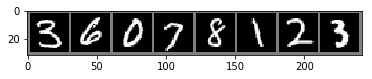

In [65]:
display_batch(images)

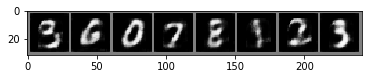

In [66]:
compressed_images = net(images)
display_batch(compressed_images.detach())